# Support Vector Machines

# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [3]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [4]:
c = pd.read_csv('Companydata.csv')

In [5]:
#To find whether there are any existing null values or not
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
#Count of duplicated rows
c[c.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


<AxesSubplot:>

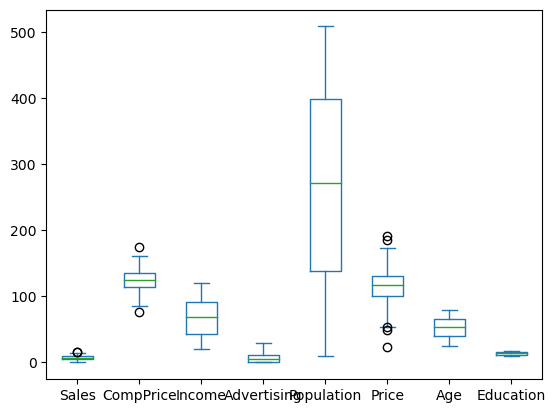

In [7]:
#Outlier Detection
c.plot(kind='box')

<AxesSubplot:>

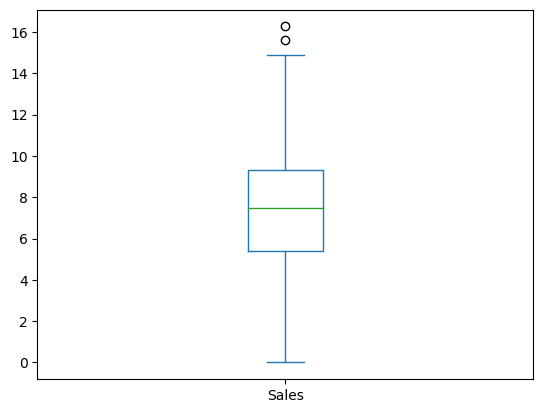

In [8]:
c.Sales.plot(kind='box')

In [9]:
c.Sales.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [10]:
IQR = 9.320000 - 5.390000
IQR

3.9300000000000006

In [11]:
#Calculation of upper fence
upper_fence = 9.320000 + (1.5*IQR)
upper_fence

15.215000000000002

In [12]:
index=c[c.Sales>15.215000000000002].index
c = c.drop(index,axis=0)

<AxesSubplot:>

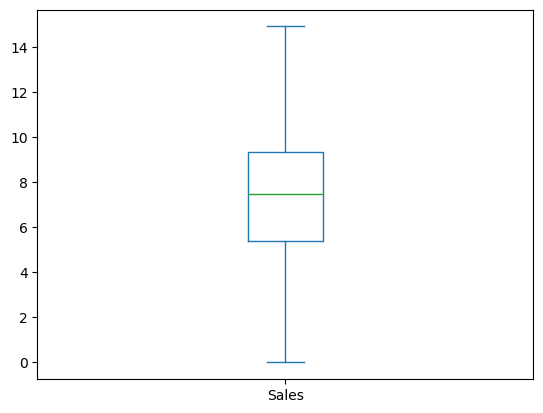

In [13]:
c.Sales.plot(kind='box')

<AxesSubplot:>

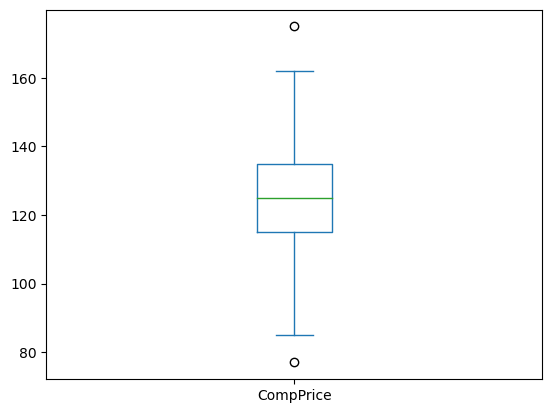

In [14]:
c.CompPrice.plot(kind='box')

In [15]:
c.CompPrice.describe()

count    398.000000
mean     124.942211
std       15.351275
min       77.000000
25%      115.000000
50%      125.000000
75%      135.000000
max      175.000000
Name: CompPrice, dtype: float64

In [16]:
IQR = 135.000000 - 115.000000
IQR

20.0

In [17]:
#Calculation of upper fence
upper_fence = 135.000000 + (1.5*IQR)
upper_fence

165.0

In [18]:
#Calculation of lower fence
lower_fence = 115.000000 - (1.5*IQR)
lower_fence

85.0

In [19]:
index=c[c.CompPrice>165.0].index
c = c.drop(index,axis=0)

In [20]:
index=c[c.CompPrice<85.0].index
c = c.drop(index,axis=0)

<AxesSubplot:>

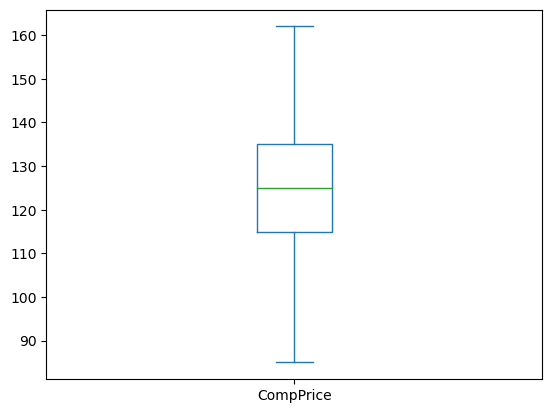

In [21]:
c.CompPrice.plot(kind='box')

<AxesSubplot:>

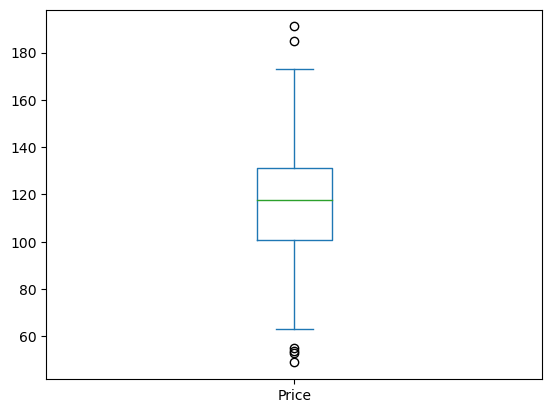

In [22]:
c.Price.plot(kind='box')

In [23]:
c.Price.describe()

count    396.000000
mean     116.070707
std       23.069077
min       49.000000
25%      100.750000
50%      117.500000
75%      131.000000
max      191.000000
Name: Price, dtype: float64

In [24]:
IQR = 131.000000 - 100.750000
IQR

30.25

In [25]:
#Calculation of upper fence
upper_fence = 131.000000 + (1.5*IQR)
upper_fence

176.375

In [26]:
index=c[c.Price>176.375].index
c = c.drop(index,axis=0)

In [27]:
index=c[c.Price<55.375].index
c = c.drop(index,axis=0)

<AxesSubplot:>

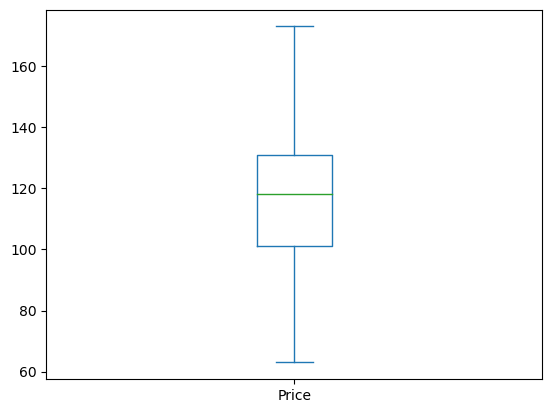

In [28]:
c.Price.plot(kind='box')

In [29]:
c.loc[c['Sales'] < 6, 'Target'] = 'Low'
c.loc[c['Sales'] >= 6, 'Target'] = 'High'
c.head(50)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Target
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,High
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes,High
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No,High
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes,High
8,6.54,132,110,0,108,124,Medium,76,10,No,No,High
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes,Low


In [30]:
#Converting the categorical data to Binary data
c['Urban'] = c['Urban'].astype('category').cat.codes
c['US'] = c['US'].astype('category').cat.codes
c['ShelveLoc'] = c['ShelveLoc'].astype('category').cat.codes
c['Target'] = c['Target'].astype('category').cat.codes
c

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Target
0,9.50,138,73,11,276,120,0,42,17,1,1,0
1,11.22,111,48,16,260,83,1,65,10,1,1,0
2,10.06,113,35,10,269,80,2,59,12,1,1,0
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,0
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,0
398,5.94,100,79,7,284,95,0,50,12,1,1,1


In [291]:
array = c.values
X = array[:,0:10]
Y = array[:,11]
seed = 7

In [292]:
X

array([[  9.5 , 138.  ,  73.  , ...,  42.  ,  17.  ,   1.  ],
       [ 11.22, 111.  ,  48.  , ...,  65.  ,  10.  ,   1.  ],
       [ 10.06, 113.  ,  35.  , ...,  59.  ,  12.  ,   1.  ],
       ...,
       [  7.41, 162.  ,  26.  , ...,  40.  ,  18.  ,   1.  ],
       [  5.94, 100.  ,  79.  , ...,  50.  ,  12.  ,   1.  ],
       [  9.71, 134.  ,  37.  , ...,  49.  ,  16.  ,   1.  ]])

In [293]:
Y

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 1.

# Train & Test Data Split

In [294]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)

In [295]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((312, 10), (312,), (78, 10), (78,))

# Grid Search CV

In [296]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'C':[15,14,13,12,11,10,1] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 1], 'kernel': ['rbf']}])

In [297]:
gsv.best_params_ , gsv.best_score_ 

({'C': 15, 'kernel': 'rbf'}, 0.7533266129032259)

# Building SVM Model using best parameters & Monitoring Run Time

In [298]:
%%time
# Perform feature selection and data preprocessing here

# Set up a parameter grid for GridSearchCV
param_grid = [
    {'kernel':['rbf'],'C':[0.1, 1, 10, 100], 'gamma':[0.1, 1, 10, 100]},
    {'kernel':['linear'],'C':[0.1, 1, 10, 100]},
    {'kernel':['poly'],'C':[0.1, 1, 10, 100], 'degree':[2, 3, 4]},
    {'kernel':['sigmoid'],'C':[0.1, 1, 10, 100], 'gamma':[0.1, 1, 10, 100]}
]

# Set up the GridSearchCV object
clf = SVC()
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)

# Print the best parameters and score obtained from GridSearchCV
print("Best parameters:", gsv.best_params_)
print("Best score:", gsv.best_score_)

Best parameters: {'C': 1, 'kernel': 'linear'}
Best score: 0.9870967741935484
CPU times: user 10 s, sys: 7 µs, total: 10 s
Wall time: 10.9 s


# Accuracy using SVM Model

In [301]:
# Train the SVC with the best hyperparameters
clf = SVC(kernel=gsv.best_params_['kernel'], C=gsv.best_params_['C'])
clf.fit(X_train, y_train)

# Evaluate the accuracy of the model on the train set
y_pred = clf.predict(X_train)
acc = accuracy_score(y_train, y_pred) * 100
print("Accuracy: {:.2f}%".format(acc))
print("Confusion matrix:\n",confusion_matrix(y_train, y_pred))

Accuracy: 99.04%
Confusion matrix:
 [[211   1]
 [  2  98]]


In [302]:
# Evaluate the accuracy of the model on the test set
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy: {:.2f}%".format(acc))
print("Confusion matrix:\n",confusion_matrix(y_test, y_pred))

Accuracy: 96.15%
Confusion matrix:
 [[48  2]
 [ 1 27]]
